Objetivo específico: Buscar padrões que sejam capazes de caracterizar a criação animal no biotério do ICC; 

#11 Questão: Como foi a sexagem de animais por linhagem ?

Hipótese: existe uma variação anual entre o nascimento dos animais criados no biotério de acordo
com cada linhagem.



In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# plt.rcParams.update({'font.size': 20})
# plt.rcParams['xtick.labelsize'] = 20
# plt.rcParams['ytick.labelsize'] = 20

In [2]:
eel = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
eel.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
1,1408122540,Giovanny,Swiss A,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
2,1408122540,Giovanny,Swiss A,2,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
3,1408122540,Giovanny,Swiss B,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
4,1408122540,Giovanny,Swiss B,3,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
5,1408122540,Giovanny,Swiss B,4,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

INFORMAÇÕES PÓS SEXAGEM MACHOS

In [3]:
#Filtrando coluna com as condições

num_sexa_m = eel[(eel['util'] == 'sex') & (eel['num_sex_m'] < 200)]

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=

#lista com nome das colunas referentes a datas
datas = ['date_hoje', 
         'date_nasc', 
         'data_inicio', 
         'date_acas', 
         'date_nasc_acas', 
         'date_sex', 
         'data_solic', 
         'data_forn', 
         'data_fim']

#laço que em c percorre em datas e padronizando tudo em formato de data pela função to_datetime
for c in datas:
    num_sexa_m[c] = pd.to_datetime(num_sexa_m[c], unit = 's') #indica o formato das datas
    
num_sexa_m.head()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
458,2014-10-30 12:06:36,Tania,S129WT,4,m,2014-10-21 12:43:17,374,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:06:36,4,666,666,666,AAA,AAA
465,2014-10-30 12:34:35,Tania,Swiss E,16,m,2014-10-06 18:11:54,463,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:34:35,3,666,666,666,AAA,I
467,2014-10-30 12:34:35,Tania,Swiss E,13,m,2014-10-06 18:11:54,465,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:34:35,3,666,666,666,AAA,I
489,2014-11-05 17:13:53,Tania,S129WT,666,m,2014-10-21 12:43:17,376,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-11-05 17:13:53,4,666,666,666,AAA,AAA
517,2014-11-11 12:26:51,Tania,C57BL06WT,6,m,2014-11-11 12:25:07,515,sex,666,1970-01-01 00:11:06,...,2014-11-11 12:26:51,2014-11-11 12:26:51,6,2014-11-11 12:26:51,4,666,666,666,AAA,AAA


In [4]:
#Filtrando linhagens a não serem utilizadas
ling_ex = [
    'Test',
    'AAA',
    'Swiss',
    'C57BL06WT\t',
    'Swiss/CFW B',
    'Swiss/CFW D',
    'Swiss/CFW A',
    'Swiss/CFW C',
    'Swiss/CFW',
    'Swiss-2',
    'Swiss-2 A ',
    'NZB/BINJ',
    'NZW/LacJ',
    'NOD / SHILTJ'
]

tirar_ling_m = num_sexa_m[
    (num_sexa_m['ling'] != ling_ex[0]) &
    (num_sexa_m['ling'] != ling_ex[1]) &
    (num_sexa_m['ling'] != ling_ex[2]) &
    (num_sexa_m['ling'] != ling_ex[3]) &
    (num_sexa_m['ling'] != ling_ex[4]) &
    (num_sexa_m['ling'] != ling_ex[5]) &
    (num_sexa_m['ling'] != ling_ex[6]) &
    (num_sexa_m['ling'] != ling_ex[7]) &
    (num_sexa_m['ling'] != ling_ex[8]) &
    (num_sexa_m['ling'] != ling_ex[9]) &
    (num_sexa_m['ling'] != ling_ex[10]) &
    (num_sexa_m['ling'] != ling_ex[11]) &
    (num_sexa_m['ling'] != ling_ex[12]) &
    (num_sexa_m['ling'] != ling_ex[13])
]
len(tirar_ling_m)

1503

In [5]:
ling_ex = [
    'Test',
    'AAA',
    'Swiss',
    'C57BL06WT\t',
    'Swiss/CFW B',
    'Swiss/CFW D',
    'Swiss/CFW A',
    'Swiss/CFW C',
    'Swiss/CFW',
    'Swiss-2',
    'Swiss-2 A ',
    'NZB/BINJ',
    'NZW/LacJ',
    'NOD / SHILTJ'
]

#Fiz uma condição para que as linhagens da lista acima fosse filtradas e descartadas da análise

if all(num_sexa_m['ling'] != tuple(ling_ex)): #função all(iterável)`Retorna `True` se todos os elementos do iterável forem verdadeiros (ou se o iterável for vazio).
    #Transformei a lista numa tupla pq o tamanho como lista estava interferindo, resultando em erro
    print ('deu') #caso fosse TRUE
else:
    print('nao deu')

deu


In [6]:
#num_nasc[num_nasc['num_sex_f'] < 200].head()
tirar_ling_m['num_sex_m'].sum()

5173

In [7]:
#pq depois de filtrar ainda aparece o 666 na minha dataframe???????????? :C

sexagem_test_m = pd.DataFrame(tirar_ling_m['date_hoje'])
sexagem_test_m['date_sex'] = tirar_ling_m['date_sex']
sexagem_test_m['ling'] = tirar_ling_m['ling']#criação da DataFrame "tirar_ling com a coluna de data"
sexagem_test_m['num_sex_m'] = tirar_ling_m['num_sex_m']#criação de coluna(serie_temp) que estará inserida na DataFrame
sexagem_test_m = sexagem_test_m.set_index('date_hoje') #identificando a nova coluna como index data_hoje
sexagem_test_m.head()

,date_sex,ling,num_sex_m
date_hoje,,,
2014-10-30 12:06:36,2014-10-30 12:06:36,S129WT,4
2014-10-30 12:34:35,2014-10-30 12:34:35,Swiss E,3
2014-10-30 12:34:35,2014-10-30 12:34:35,Swiss E,3
2014-11-05 17:13:53,2014-11-05 17:13:53,S129WT,4
2014-11-11 12:26:51,2014-11-11 12:26:51,C57BL06WT,4


In [8]:
tsAno = sexagem_test_m.resample('M').sum()
tsAno

,num_sex_m
date_hoje,
2014-10-31,10
2014-11-30,15
2014-12-31,17
2015-01-31,42
2015-02-28,0
2015-03-31,21
2015-04-30,91
2015-05-31,22
2015-06-30,65


In [9]:
num_sexa_m.loc[num_sexa_m.index.min(), 'date_sex']


Timestamp('2014-10-30 12:06:36')

In [10]:
sexagem_test_m[sexagem_test_m['ling'] == 'Balb/c']
sexagem_test_m.head()

,date_sex,ling,num_sex_m
date_hoje,,,
2014-10-30 12:06:36,2014-10-30 12:06:36,S129WT,4
2014-10-30 12:34:35,2014-10-30 12:34:35,Swiss E,3
2014-10-30 12:34:35,2014-10-30 12:34:35,Swiss E,3
2014-11-05 17:13:53,2014-11-05 17:13:53,S129WT,4
2014-11-11 12:26:51,2014-11-11 12:26:51,C57BL06WT,4


Gráfico plotando a soma de período anual por linhagem após sexagem Macho.

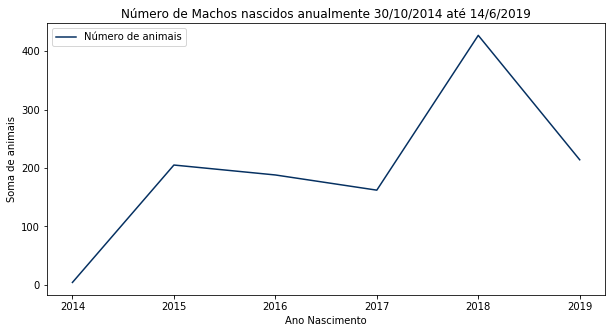

In [11]:
inic_sex_m = num_sexa_m.loc[num_sexa_m.index.min(), 'date_sex'] #loc: localizador - localizando a primeira data
fim_sex_m = num_sexa_m.loc[num_sexa_m.index.max(), 'date_sex']

tsAno = sexagem_test_m[sexagem_test_m['ling'] == 'Balb/c']['num_sex_m'].resample('A').sum() #resample('A') agrupamento por ano, sum() somando os dados

tsAno.plot(
    figsize=(10, 5),
        colormap='RdBu_r',
        title=f'Número de Machos nascidos anualmente {inic_sex_m.day}/{inic_sex_m.month}/{inic_sex_m.year} até {fim_sex_m.day}/{fim_sex_m.month}/{fim_sex_m.year}'
)
plt.legend(['Número de animais'])
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')
plt.savefig(
    fname="../resultados/sex_macho_anoaano.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

In [12]:
# sexagem_test_m[sexagem_test_m['ling'] == '129/SV-E']['num_sex_m'].resample('A').sum().plot()
# sexagem_test_m[sexagem_test_m['ling'] == 'AG129']['num_sex_m'].resample('A').sum()
# sexagem_test_m[sexagem_test_m['ling'] == 'Balb/c']['num_sex_m'].resample('A').sum()
# sexagem_test_m[sexagem_test_m['ling'] == 'C3H']['num_sex_m'].resample('A').sum()
# sexagem_test_m[sexagem_test_m['ling'] == 'C57BL/6']['num_sex_m'].resample('A').sum()
# sexagem_test_m[sexagem_test_m['ling'] == 'DBA/1J']['num_sex_m'].resample('A').sum()
# sexagem_test_m[sexagem_test_m['ling'] == 'S129KO']['num_sex_m'].resample('A').sum()

Gráfico plotando a soma de período anual todas as linhagens após sexagem Macho (isogênico).

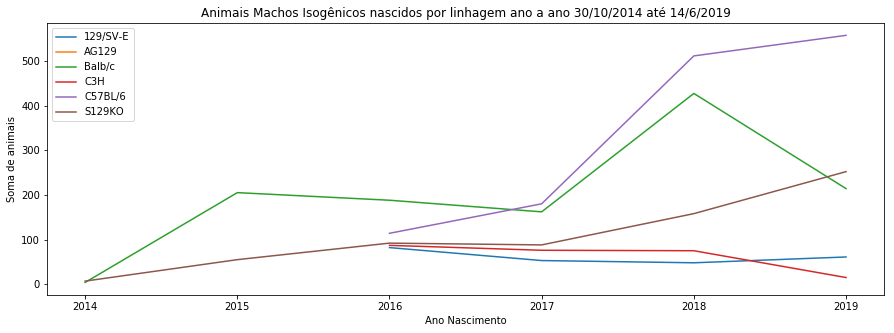

In [13]:
#Linhagem DBA/1J foi tirada da plotagem pois não está registrada informações sobre sexagem.

test_iso = ['129/SV-E', 
        'AG129', 
        'Balb/c', 
        'C3H', 
        'C57BL/6', 
        'S129KO'] 

plt.figure(figsize=(15, 5))
for i in test_iso:
    sexagem_test_m[sexagem_test_m['ling'] == i]['num_sex_m'].resample('A').sum().plot()  
plt.title(f'Animais Machos Isogênicos nascidos por linhagem ano a ano {inic_sex_m.day}/{inic_sex_m.month}/{inic_sex_m.year} até {fim_sex_m.day}/{fim_sex_m.month}/{fim_sex_m.year}')
plt.legend(test_iso)
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')
plt.savefig(
    fname="../resultados/11_pergunta_iso_macho_anoaano.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico plotando a soma de período anual todas as linhagens após sexagem Macho (heterogênico).

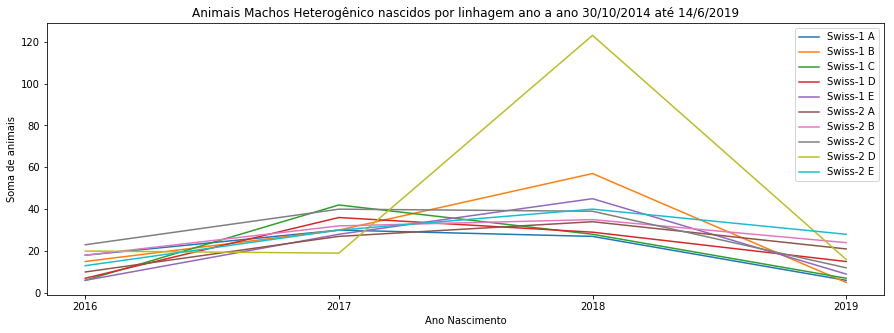

In [14]:
test_het= ['Swiss-1 A', 
        'Swiss-1 B',
        'Swiss-1 C', 
        'Swiss-1 D', 
        'Swiss-1 E', 
        'Swiss-2 A',
        'Swiss-2 B', 
        'Swiss-2 C', 
        'Swiss-2 D',
        'Swiss-2 E']

plt.figure(figsize=(15, 5))
for h in test_het:
    sexagem_test_m[sexagem_test_m['ling'] == h]['num_sex_m'].resample('A').sum().plot()  
plt.title(f'Animais Machos Heterogênico nascidos por linhagem ano a ano {inic_sex_m.day}/{inic_sex_m.month}/{inic_sex_m.year} até {fim_sex_m.day}/{fim_sex_m.month}/{fim_sex_m.year}')
plt.legend(test_het)
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')
plt.savefig(
    fname="../resultados/11_pergunta_het_macho_anoaano.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico plotando a soma de período mensal por linhagem após sexagem Macho.

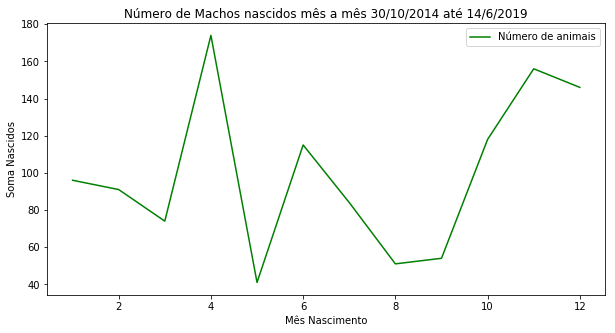

In [15]:
tsMes = sexagem_test_m[sexagem_test_m['ling'] == 'Balb/c']['num_sex_m'].groupby([lambda x: x.month]).sum()

tsMes.plot(
        figsize=(10, 5),
        colormap='ocean',
        title=f'Número de Machos nascidos mês a mês {inic_sex_m.day}/{inic_sex_m.month}/{inic_sex_m.year} até {fim_sex_m.day}/{fim_sex_m.month}/{fim_sex_m.year}'
)
plt.legend(['Número de animais']) #legenda
plt.xlabel('Mês Nascimento') #identificação eixo x
plt.ylabel('Soma Nascidos') #identificação eixo y
plt.savefig(
    fname="../resultados/11_pergunta_sex_macho_mesames.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico plotando a soma de período mensal para todas as linhagens após sexagem Macho (isogênicos).

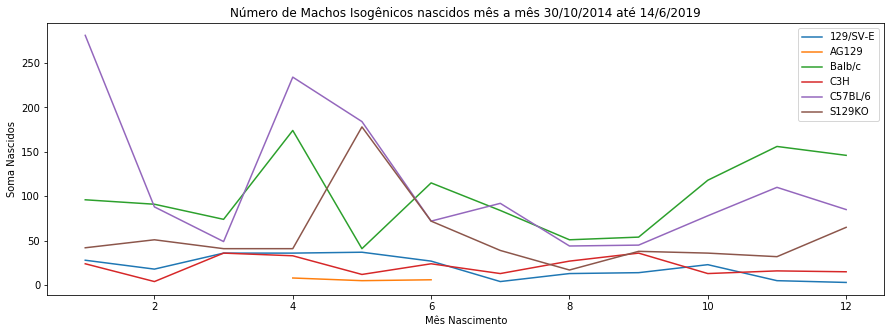

In [16]:
#Linhagem DBA/1J foi tirada da plotagem pois não está registrada informações sobre sexagem.

test_iso = ['129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6', 'S129KO']


plt.figure(figsize=(15, 5))
for i in test_iso:
    sexagem_test_m[sexagem_test_m['ling'] == i]['num_sex_m'].groupby([lambda x: x.month]).sum().plot()
plt.title (f'Número de Machos Isogênicos nascidos mês a mês {inic_sex_m.day}/{inic_sex_m.month}/{inic_sex_m.year} até {fim_sex_m.day}/{fim_sex_m.month}/{fim_sex_m.year}')
plt.legend(test_iso) 
plt.xlabel('Mês Nascimento') 
plt.ylabel('Soma Nascidos')
plt.savefig(
    fname="../resultados/11_pergunta_iso_macho_mesames.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico plotando a soma de período mensal para todas as linhagens após sexagem Macho (heterogênicos).

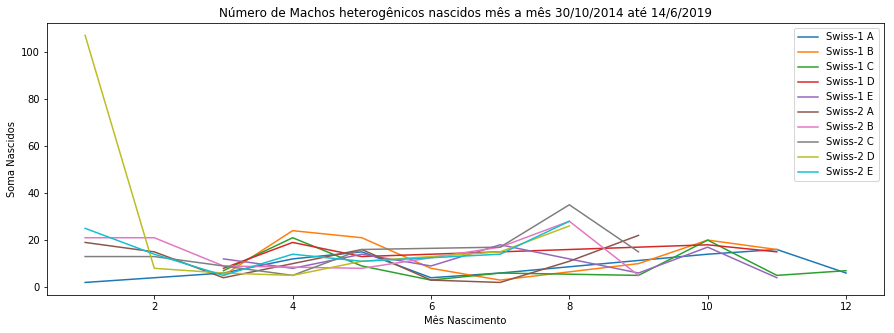

In [17]:
test_het= ['Swiss-1 A', 
        'Swiss-1 B',
        'Swiss-1 C', 
        'Swiss-1 D', 
        'Swiss-1 E', 
        'Swiss-2 A',
        'Swiss-2 B', 
        'Swiss-2 C', 
        'Swiss-2 D',
        'Swiss-2 E']

plt.figure(figsize=(15, 5))
for h in test_het:
    sexagem_test_m[sexagem_test_m['ling'] == h]['num_sex_m'].groupby([lambda x: x.month]).sum().plot()
plt.title (f'Número de Machos heterogênicos nascidos mês a mês {inic_sex_m.day}/{inic_sex_m.month}/{inic_sex_m.year} até {fim_sex_m.day}/{fim_sex_m.month}/{fim_sex_m.year}')
plt.legend(test_het) 
plt.xlabel('Mês Nascimento') 
plt.ylabel('Soma Nascidos')
plt.savefig(
    fname="../resultados/11_pergunta_het_macho_mesames.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

INFORMAÇÕES PÓS SEXAGEM FÊMEAS

In [18]:
num_sexa_f = eel[(eel['util'] == 'sex') & (eel['num_sex_f'] < 200)]
num_sexa_f.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
460,1414670796,Tania,S129WT,2,f,1413895397,458,sex,666,666,...,666,666,666,1414670796,666,2,666,666,AAA,AAA
463,1414672475,Tania,Swiss E,19,f,1412619114,454,sex,666,666,...,666,666,666,1414672475,666,3,666,666,AAA,I
491,1415207633,Tania,S129WT,665,f,1413895397,489,sex,666,666,...,666,666,666,1415207633,666,1,666,666,AAA,AAA
515,1415708811,Tania,C57BL06WT,4,f,1415708707,513,sex,666,666,...,1415708811,1415708811,6,1415708811,666,2,666,666,AAA,AAA
534,1415796433,Tania,S129WT,1,f,1413895397,375,sex,666,666,...,666,666,666,1415796433,666,1,666,666,AAA,AAA


In [19]:
datas = ['date_hoje', 
         'date_nasc', 
         'data_inicio', 
         'date_acas', 
         'date_nasc_acas', 
         'date_sex', 
         'data_solic', 
         'data_forn', 
         'data_fim']

#laço que em c percorre em datas e padronizando tudo em formato de data pela função to_datetime
for c in datas:
    num_sexa_f[c] = pd.to_datetime(num_sexa_f[c], unit = 's') #indica o formato das datas
    
num_sexa_f.head()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
460,2014-10-30 12:06:36,Tania,S129WT,2,f,2014-10-21 12:43:17,458,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:06:36,666,2,666,666,AAA,AAA
463,2014-10-30 12:34:35,Tania,Swiss E,19,f,2014-10-06 18:11:54,454,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:34:35,666,3,666,666,AAA,I
491,2014-11-05 17:13:53,Tania,S129WT,665,f,2014-10-21 12:43:17,489,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-11-05 17:13:53,666,1,666,666,AAA,AAA
515,2014-11-11 12:26:51,Tania,C57BL06WT,4,f,2014-11-11 12:25:07,513,sex,666,1970-01-01 00:11:06,...,2014-11-11 12:26:51,2014-11-11 12:26:51,6,2014-11-11 12:26:51,666,2,666,666,AAA,AAA
534,2014-11-12 12:47:13,Tania,S129WT,1,f,2014-10-21 12:43:17,375,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-11-12 12:47:13,666,1,666,666,AAA,AAA


In [20]:
ling_ex = [
    'Test',
    'AAA',
    'Swiss',
    'C57BL06WT\t',
    'Swiss/CFW B',
    'Swiss/CFW D',
    'Swiss/CFW A',
    'Swiss/CFW C',
    'Swiss/CFW',
    'Swiss-2',
    'Swiss-2 A ',
    'NZB/BINJ',
    'NZW/LacJ',
    'NOD / SHILTJ'
]

tirar_ling_f = num_sexa_f[
    (num_sexa_f['ling'] != ling_ex[0]) &
    (num_sexa_f['ling'] != ling_ex[1]) &
    (num_sexa_f['ling'] != ling_ex[2]) &
    (num_sexa_f['ling'] != ling_ex[3]) &
    (num_sexa_f['ling'] != ling_ex[4]) &
    (num_sexa_f['ling'] != ling_ex[5]) &
    (num_sexa_f['ling'] != ling_ex[6]) &
    (num_sexa_f['ling'] != ling_ex[7]) &
    (num_sexa_f['ling'] != ling_ex[8]) &
    (num_sexa_f['ling'] != ling_ex[9]) &
    (num_sexa_f['ling'] != ling_ex[10]) &
    (num_sexa_f['ling'] != ling_ex[11]) &
    (num_sexa_f['ling'] != ling_ex[12]) &
    (num_sexa_f['ling'] != ling_ex[13])
]
len(tirar_ling_f)

1453

In [21]:
tirar_ling_f['num_sex_f'].sum()

4964

In [22]:
sexagem_test_f = pd.DataFrame(tirar_ling_f['date_hoje'])
sexagem_test_f['date_sex'] = tirar_ling_f['date_sex']
sexagem_test_f['ling'] = tirar_ling_f['ling']#criação da DataFrame "tirar_ling com a coluna de data"
sexagem_test_f['num_sex_f'] = tirar_ling_f['num_sex_f']#criação de coluna(serie_temp) que estará inserida na DataFrame
sexagem_test_f = sexagem_test_f.set_index('date_hoje') #identificando a nova coluna como index data_hoje
sexagem_test_f.head()

,date_sex,ling,num_sex_f
date_hoje,,,
2014-10-30 12:06:36,2014-10-30 12:06:36,S129WT,2
2014-10-30 12:34:35,2014-10-30 12:34:35,Swiss E,3
2014-11-05 17:13:53,2014-11-05 17:13:53,S129WT,1
2014-11-11 12:26:51,2014-11-11 12:26:51,C57BL06WT,2
2014-11-12 12:47:13,2014-11-12 12:47:13,S129WT,1


Gráfico plotando a soma de período anual por linhagens após sexagem Fêmea.

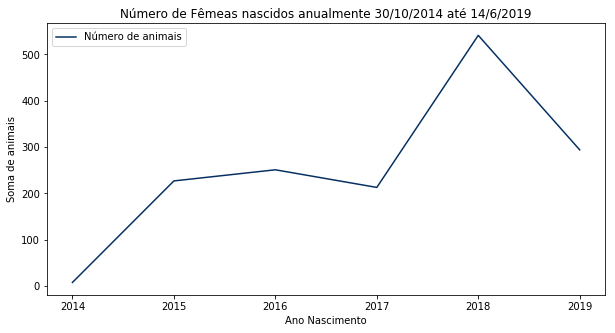

In [23]:
inic_sex_f = num_sexa_f.loc[num_sexa_f.index.min(), 'date_sex'] #loc: localizador - localizando a primeira data
fim_sex_f = num_sexa_f.loc[num_sexa_f.index.max(), 'date_sex']

tsAno = sexagem_test_f[sexagem_test_f['ling'] == 'Balb/c']['num_sex_f'].resample('A').sum() #resample('A') agrupamento por ano, sum() somando os dados

tsAno.plot(
    figsize=(10, 5),
        colormap='RdBu_r',
        title=f'Número de Fêmeas nascidos anualmente {inic_sex_m.day}/{inic_sex_m.month}/{inic_sex_m.year} até {fim_sex_m.day}/{fim_sex_m.month}/{fim_sex_m.year}'
)
plt.legend(['Número de animais'])
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')
plt.savefig(
    fname="../resultados/11_pergunta_sexa_femea_anoaano.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico plotando a soma de período anual para todas as linhagens após sexagem Fêmeas (isogênicas).

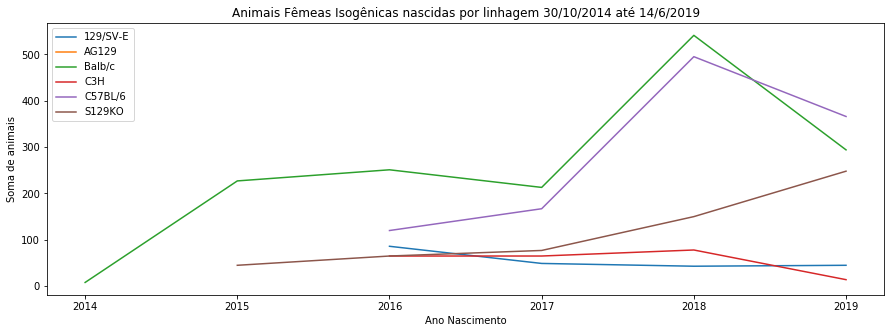

In [24]:
#Linhagem DBA/1J foi tirada da plotagem pois não está registrada informações sobre sexagem.
test_iso = ['129/SV-E', 
        'AG129', 
        'Balb/c', 
        'C3H', 
        'C57BL/6', 
        'S129KO'] 

plt.figure(figsize=(15, 5))
for i in test_iso:
    sexagem_test_f[sexagem_test_f['ling'] == i]['num_sex_f'].resample('A').sum().plot()  
plt.title(f'Animais Fêmeas Isogênicas nascidas por linhagem {inic_sex_f.day}/{inic_sex_f.month}/{inic_sex_f.year} até {fim_sex_f.day}/{fim_sex_f.month}/{fim_sex_f.year}')
plt.legend(test_iso)
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')
plt.savefig(
    fname="../resultados/11_pergunta_iso_femea_anoaano.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico plotando a soma de período anual para todas as linhagens após sexagem Fêmeas (heterogênicas).

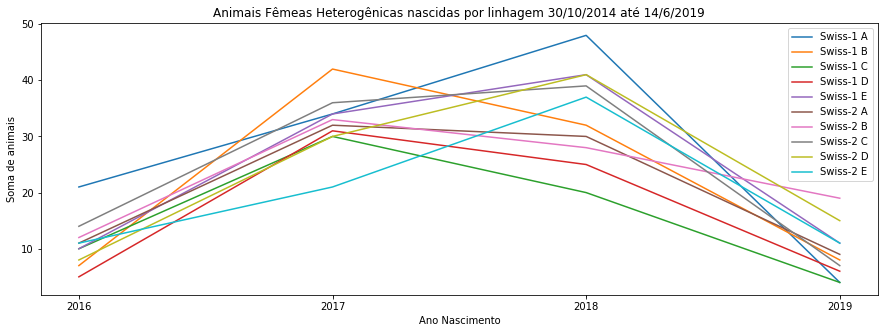

In [25]:
test_het= ['Swiss-1 A', 
        'Swiss-1 B',
        'Swiss-1 C', 
        'Swiss-1 D', 
        'Swiss-1 E', 
        'Swiss-2 A',
        'Swiss-2 B', 
        'Swiss-2 C', 
        'Swiss-2 D',
        'Swiss-2 E']

plt.figure(figsize=(15, 5))
for h in test_het:
    sexagem_test_f[sexagem_test_f['ling'] == h]['num_sex_f'].resample('A').sum().plot()  
plt.title(f'Animais Fêmeas Heterogênicas nascidas por linhagem {inic_sex_f.day}/{inic_sex_f.month}/{inic_sex_f.year} até {fim_sex_f.day}/{fim_sex_f.month}/{fim_sex_f.year}')
plt.legend(test_het)
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')
plt.savefig(
    fname="../resultados/11_pergunta_het_femea_anoaano.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico plotando a soma de período mensal por linhagens após sexagem Fêmea.

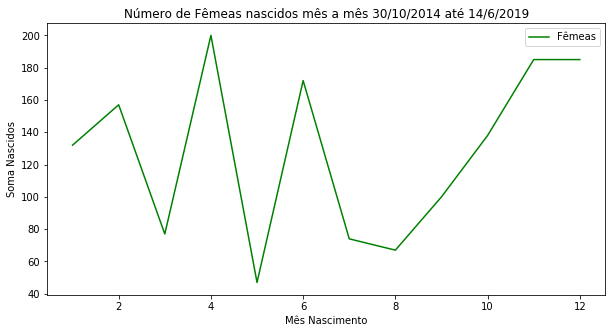

In [26]:
tsMes = sexagem_test_f[sexagem_test_f['ling'] == 'Balb/c']['num_sex_f'].groupby([lambda x: x.month]).sum()

tsMes.plot(
        figsize=(10, 5),
        colormap='ocean',
        title=f'Número de Fêmeas nascidos mês a mês {inic_sex_f.day}/{inic_sex_f.month}/{inic_sex_f.year} até {fim_sex_f.day}/{fim_sex_f.month}/{fim_sex_f.year}'
)
plt.legend(['Fêmeas']) #legenda
plt.xlabel('Mês Nascimento') #identificação eixo x
plt.ylabel('Soma Nascidos') #identificação eixo y
plt.savefig(
    fname="../resultados/11_pergunta_sex_femea_mesames.tiff", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico plotando a soma de período mensal para todas linhagens após sexagem Fêmea (Isogênicas).

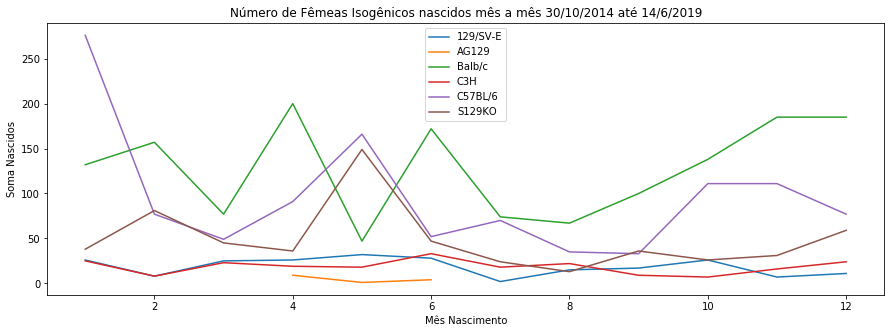

In [27]:
#Linhagem DBA/1J foi tirada da plotagem pois não está registrada informações sobre sexagem.

test_iso = ['129/SV-E', 'AG129', 'Balb/c', 'C3H', 'C57BL/6', 'S129KO']


plt.figure(figsize=(15, 5))
for i in test_iso:
    sexagem_test_f[sexagem_test_f['ling'] == i]['num_sex_f'].groupby([lambda x: x.month]).sum().plot()
plt.title (f'Número de Fêmeas Isogênicos nascidos mês a mês {inic_sex_f.day}/{inic_sex_f.month}/{inic_sex_f.year} até {fim_sex_f.day}/{fim_sex_f.month}/{fim_sex_f.year}')
plt.legend(test_iso) 
plt.xlabel('Mês Nascimento') 
plt.ylabel('Soma Nascidos')
plt.savefig(
    fname="../resultados/11_pergunta_iso_femea_mesames.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Gráfico plotando a soma de período mensal para todas linhagens após sexagem Fêmea (Heterogênicas).

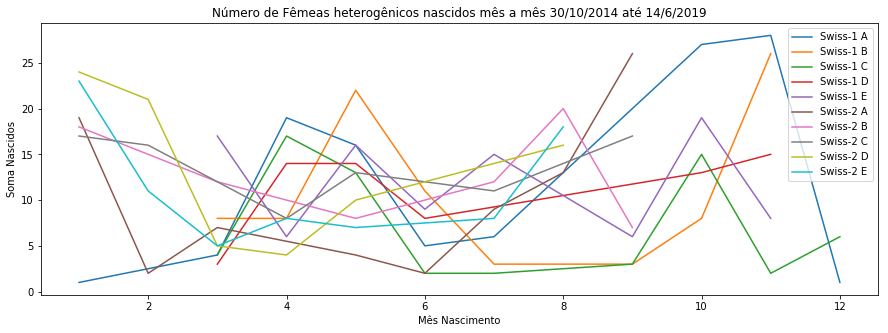

In [28]:
test_het= ['Swiss-1 A', 
        'Swiss-1 B',
        'Swiss-1 C', 
        'Swiss-1 D', 
        'Swiss-1 E', 
        'Swiss-2 A',
        'Swiss-2 B', 
        'Swiss-2 C', 
        'Swiss-2 D',
        'Swiss-2 E']

plt.figure(figsize=(15, 5))
for h in test_het:
    sexagem_test_f[sexagem_test_f['ling'] == h]['num_sex_f'].groupby([lambda x: x.month]).sum().plot()
plt.title (f'Número de Fêmeas heterogênicos nascidos mês a mês {inic_sex_f.day}/{inic_sex_f.month}/{inic_sex_f.year} até {fim_sex_f.day}/{fim_sex_f.month}/{fim_sex_f.year}')
plt.legend(test_het) 
plt.xlabel('Mês Nascimento') 
plt.ylabel('Soma Nascidos')
plt.savefig(
    fname="../resultados/11_pergunta_het_femea_mesames.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Resultado: 
Ao analisar por períodos anuais e mensais após sexagem, percebe-se um valor diferente na produção entre machos e fêmeas. O número de produção de machos é superior a das fêmeas. Porém, ao ser visto esses valores em gráficos separando machos e fêmeas o resultado é muito semelhante, propondo que segue a mesma proporção entre os períodos analisados.

Perguntar sobre o último gráfico "Número de fêmeas heterogênicos nascidos mês a mês"



Desdobramento: Criar um gráfico com todas as informações entre machos e fêmeas para melhor análise.